**introduction**

In today's world, deep learning has become a cornerstone of modern computer vision. This project aims to design and train an intelligent model capable of recognizing English digits (0–9) from images, showcasing the power of Convolutional Neural Networks (CNNs) in image processing tasks.
Using standard datasets and state-of-the-art deep learning techniques, the model achieves high accuracy in identifying handwritten digits. Such systems have wide-ranging applications—from automated form processing and document digitization to license plate recognition and beyond.
This project provides a comprehensive walkthrough of data preprocessing, model architecture design, training, and performance evaluation, making it easy for enthusiasts and researchers to follow, replicate, and build upon.

**Libraries Used**

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras import datasets
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D

**Reading the dataset and training and testing it**

In [2]:
(train_images,train_labels),(test_images,test_labels)=datasets.mnist.load_data()

**Viewing the image data information**

In [3]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


**Display**

Displaying one of the dataset images

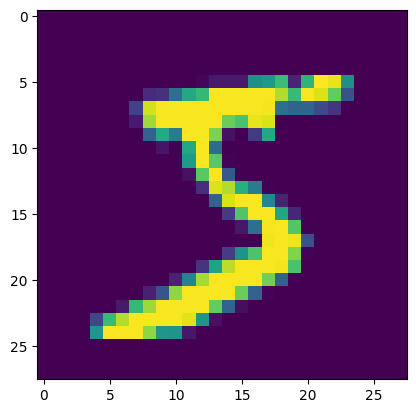

In [4]:
plt.close()
plt.imshow(train_images[0])
plt.show()

**Normalizing**

the dataset by scaling values between 0 and 1

In [5]:
train_images,test_images=train_images/255.0,test_images/255.0

Add a channel dimension to the dataset images to match the model input shape.

In [6]:
train_images=np.expand_dims(train_images,axis=3)
test_images=np.expand_dims(test_images,axis=3)
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


**Building a neural network**

Convolutional Neural Network

In [7]:
Robot=Sequential()
Robot.add(Conv2D(filters=8,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)))
Robot.add(MaxPooling2D(2,2))
Robot.add(Flatten())
Robot.add(Dense(100,activation="relu"))
Robot.add(Dense(10))

C:\Users\PcKala.org\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Get info as dataset**

In [8]:
Robot.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1352)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       135,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 136,390 (532.77 KB)

 Trainable params: 136,390 (532.77 KB)

 Non-trainable params: 0 (0.00 B)

**compileing**

In [9]:
Robot.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=["accuracy"])

**Fit**

In [10]:
Robot.fit(train_images,train_labels,epochs=40,validation_data=(test_images,test_labels))

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9388 - loss: 0.2119 - val_accuracy: 0.9758 - val_loss: 0.0784
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9787 - loss: 0.0720 - val_accuracy: 0.9752 - val_loss: 0.0744
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9846 - loss: 0.0510 - val_accuracy: 0.9829 - val_loss: 0.0504
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9881 - loss: 0.0387 - val_accuracy: 0.9816 - val_loss: 0.0554
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9908 - loss: 0.0291 - val_accuracy: 0.9831 - val_loss: 0.0518
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9930 - loss: 0.0229 - val_accuracy: 0.9846 - val_loss: 0.0473
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9943 - loss: 0.0179 - val_accuracy: 0.9842 - val_loss: 0.0550
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9961 - loss: 0.0130 - 

**Robot test**

Testing by dataset's test part

In [11]:
out1=Robot.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [12]:
out1[0]

array([-17.691364, -18.351254, -10.882461, -14.238396, -29.900349,
       -34.21513 , -31.370348,  30.589008, -21.597816, -10.448715],
      dtype=float32)

Testing by another data's

In [15]:
img = cv2.imread("2.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (28, 28))
img = cv2.bitwise_not(img)
img = img / 255.0
img = np.array([img])
img = np.expand_dims(img, axis=3)
out2 = Robot.predict(img)
m = -1000
o2 = out2[0]
ind = -1
for i in range(len(o2)):
    if o2[i] > m:
        m = o2[i]
        ind = i
print(ind)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2


In [16]:
img = cv2.imread("5.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (28, 28))
img = cv2.bitwise_not(img)
img = img / 255.0
img = np.array([img])
img = np.expand_dims(img, axis=3)
out3 = Robot.predict(img)
m = -1000
o3 = out3[0]
ind = -1
for i in range(len(o3)):
    if o3[i] > m:
        m = o3[i]
        ind = i
print(ind)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
5


**Conclusion**

This project demonstrated how convolutional neural networks (CNNs) and deep learning techniques can be effectively used to build a reliable model for recognizing English digits. Through careful data preparation, efficient preprocessing, and optimized architecture design, the model achieved impressive performance in identifying handwritten numbers.
The results not only validate the methods applied but also highlight the potential of such models for real-world applications, including optical character recognition (OCR), automated form processing, and intelligent image recognition systems.
Ultimately, this project provided a solid foundation for learning, experimentation, and further development in the field of computer vision, and can serve as a launchpad for more advanced pattern recognition and image processing initiatives.